# Hypothesis Testing

## Setup

In [70]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [71]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

## Simulation Based Approach

- Example: Codeup starts producing a scratch off lottery ticket called "Golden Codys". The odds of winning a prize must be advertised to the state, and since we are manufacturing the tickets, we know exactly how many winners and losers there are.
- Theory: Our **population** is the 1000 tickets we have manufactured
- Implementation: Create a boolean pandas Series
    - we model win with true and lose with false
    - because of this, we can take the mean of a series to measure the
      likelihood of winning

The actual probability of winning is 0.25


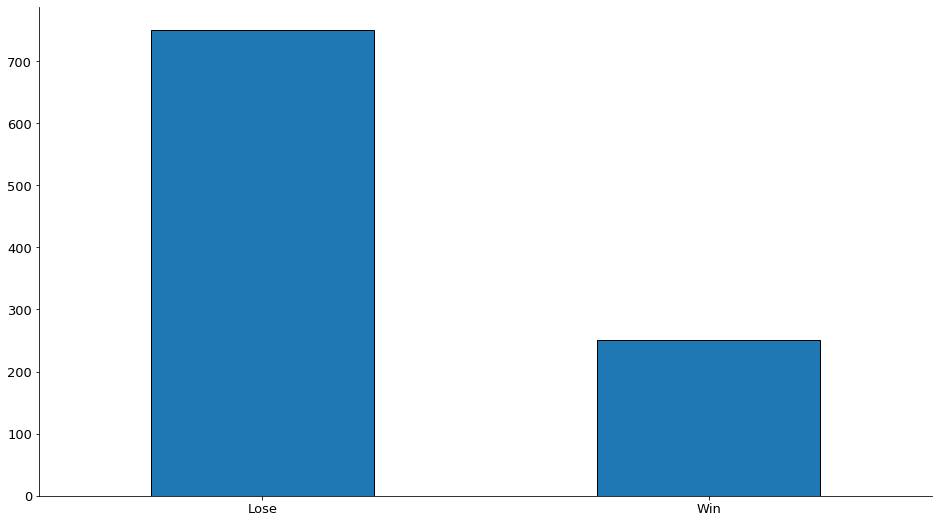

In [72]:
# tickets are a boolean series with 250 True values and 750 False values
tickets = pd.Series([True] * 250 + [False] * 750)
#plot the false and true values as lose and win as a bar plot
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation=0)
print('The actual probability of winning is %.2f' % tickets.mean())

- Scenario: Each student in a classroom is given a Golden Cody scratch off at random
- Theory

    We we take a random **sample** and calculate the win rate, we won't expect to see exactly 25% even though we know that is what the overall rate is.
    
    Examples of biased samples:
    
    - non-response: people that don't respond are a diff population
    - undercoverage: some groups aren't well represented
    - voluntary: people volunteer for surveys
    - leading questions
    - social desirability
    
- Implementation: Use the `.sample` method on our series to randomly choose 25 tickets, representing 25 students in a classroom. Use `.mean` to calculate what percentage of the values are `True`, or are winning tickets.

In [73]:
# n is the number of tickets drawn
n = 25
# take a random sample of n(25) tickets and calculate the mean
tickets.sample(n).mean()

0.12

- Scenario: each student in 4 different cohorts is given a Golden Codys scratch off ticket, we want to calculate the win rate for each classroom.
- Theory: it is unlikely any classroom will have exactly a 25% winrate, instead we will see slightly different numbers for each classroom.
- Implementation: loop through a range of 5 to get a sample and calculate the winrate 5 times. Each of the 5 numbers produced represents the calculated winrate for one classroom of 25 students.

In [74]:
#
[tickets.sample(n).mean() for _ in range(5)]

[0.28, 0.28, 0.08, 0.24, 0.36]

- Theory

    The winrates we see aren't ever exactly 25%, but we would expect the rate to be closer to 25% than further away. That is, it is more likely that a classroom will come up with a win rate of 24% than a winrate of 10%.
    
    If we were to repeat this experiment a whole bunch of times, say 10,000, we would find that the calculated winrates are, in fact, normally distributed.
    
    That is, we would expect the calculated average winrate for a classroom to follow a normal distribution, *even though* the underlying random process is not based on a normal distribution

- Implementation: To visualize this, we'll create a series full of calculated winrates for 10,000 classrooms, each classroom made up of 25 students. That is, we will simulate 10,000 classrooms of 25 students getting Golden Codys and calculate the average winrate for each of the 10,000 classrooms.

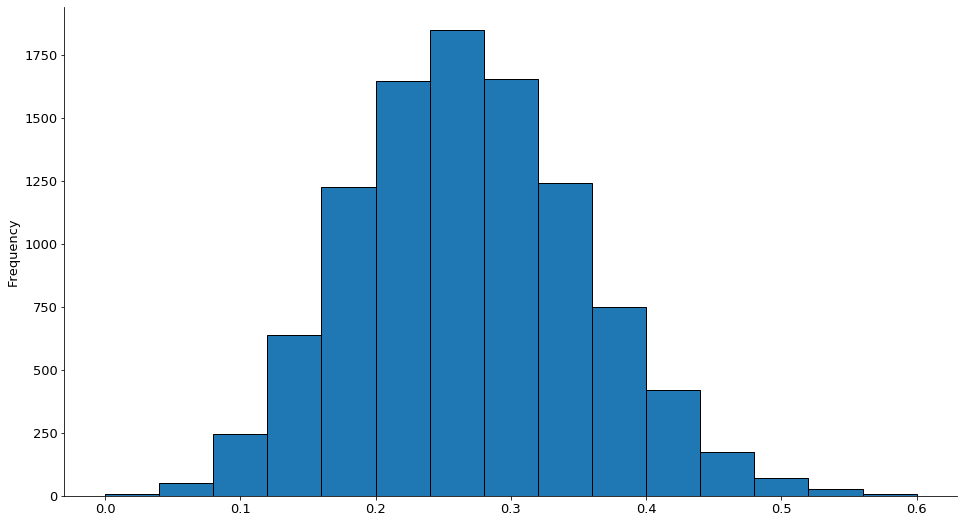

In [75]:
#calculated_winrates is a series of 10_000 win rates for a classroom of 25
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
#plotted as a histogram should show a normal distribution
calculated_winrates.plot.hist(bins=15)

- Theory

    The above visual represents the **sampling distribution** for the winrate of Golden Codys, based on a class of 25.

    The **Central Limit Theorm** says that sampling distribution will be normally distributed even if the underlying random variable isn't.

<div style="background-color: rgba(0, 100, 200, .1); padding: 1em 3em; border-radius: 5px; border: 1px solid black">
    <div style="font-weight: bold; font-size: 1.2em; border-bottom: 1px dashed black; padding-bottom: .5em;">
        Mini Exercise -- CLT
    </div>
    <ol>
        <li>Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.</li>
        <li>Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.</li>
        <li>Plot the distribution of the calculated averages. What do you notice about the shape of the distribution of calculated averages? What kind of distribution is the underlying random variable (i.e. one dice roll?)</li>
    </ol>
</div>

In [76]:
#1
(1+2+3+4+5+6)/6

3.5

In [77]:
#2
six_rolls = np.random.choice(range(1,7), size= (10_000, 6))
avg_per_trial = (six_rolls.mean(axis=1)) #axis=1 is to average the rows
avg_per_trial

array([2.83333333, 4.5       , 4.33333333, ..., 3.16666667, 3.33333333,
       4.33333333])

(array([   5.,   87.,  496., 1452., 1614., 2735., 2204., 1062.,  308.,
          37.]),
 array([1.        , 1.46666667, 1.93333333, 2.4       , 2.86666667,
        3.33333333, 3.8       , 4.26666667, 4.73333333, 5.2       ,
        5.66666667]),
 <a list of 10 Patch objects>)

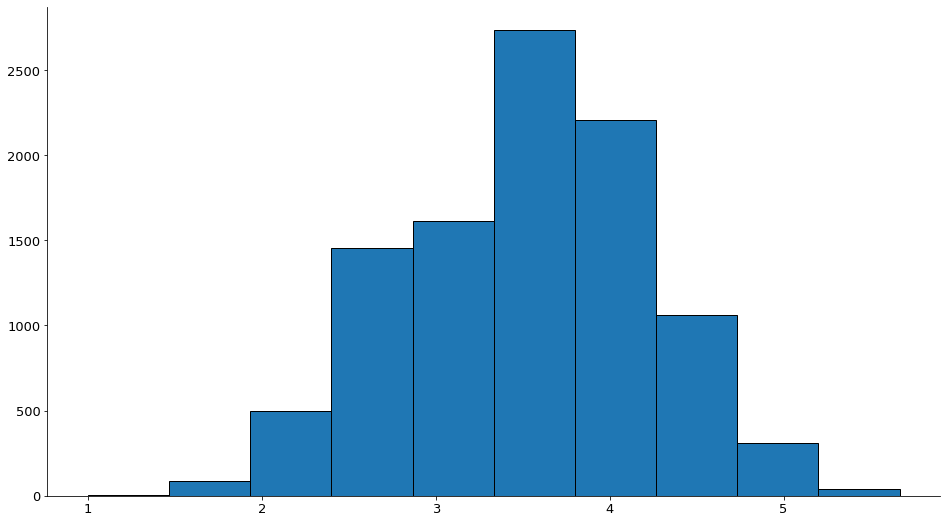

In [78]:
#3
plt.hist(avg_per_trial)
#normal distribution

In [79]:
avg_per_trial.mean()

3.4984333333333337

- Theory: in practice, we won't have 10,000 samples to work with, but rather just 1. We can stil rely on the sampling distribution being normally distributed, and this has some intersting properties.

- the mean of the sampling distribution of the sample means will be the "true" mean
- the variance of the sampling distribution is the population variable divided by the sample size
- the standard deviation of the sampling distribution is $\sqrt{\frac{pq}{n}}$ (for our example), aka the
  **standard error**

In [80]:
se = math.sqrt((.25 * .75) / n)

Let's compare our calculated standard error (i.e. the standard deviation of the
sample means) to the experimental value:

In [81]:
print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % calculated_winrates.std())

SE:                 0.0866
sample_means.std(): 0.0857


That the sampling distribution being normally distributed is very powerful and has important implications:

- confidence intervals for population parameter estimates (e.g. estimating the population mean)
    - as n goes up, interval becomes smaller
    - as certainty goes up, interval becomes larger
    - 99% of calculated CIs will contain the true mean (e.g. if we ran simulations and re-sampled, 99% of the simulations' calculated CIs would contain the true mean)
- hypothesis testing
    - One classroom calculates their winrate at 20% and claims the tickets were distributed unfairly. What is the likelihood we observe a 20% (or smaller) winrate just due to chance?

In [82]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.2) # calculated p-value

0.28283511827393837

The probability we've calculated is a **p-value**. The likelihood that we observe the data that we have if the null hypothesis is true.

## Null and Alternative Hypothesis

- $H_0$: status quo: no difference or no effect
- $H_a$: alternative: there is a difference or effect
- whether $H_a$ is $\neq$, <, >, determines **one-tailed** vs **two-tailed test**
    - < or > == *one-tailed*
    - $\neq$ == *two-tailed*

### Hypothesis Testing Results

|                      | $H_0$ is true | $H_0$ is false |
| -------------------  | ------------- | -------------- |
| Fail to reject $H_0$ | TN            | FN (Type II)   |
| Reject $H_0$         | FP (Type I)   | TP             |

<div style="background-color: rgba(0, 100, 200, .1); padding: 1em 3em; border-radius: 5px; border: 1px solid black">
    <div style="font-weight: bold; font-size: 1.2em; border-bottom: 1px dashed black; padding-bottom: .5em;">
        Mini Exercise -- Null + Alternate Hypothesis and Errors
    </div>
    <p>For each of the following scenarios: refine the question, generate a null and alternative hypothesis, and give examples of true positives, true negatives, type I and type II errors.</p>
    <ul>
        <li>Are the average grades in web development vs data science classes different?</li>
        <li>Is there a relationship between how early a student shows up to class and their grade?</li>
        <li>Are web dev or data science students more likely to be coffee drinkers?</li>
    </ul>
</div>

##### Are the average grades in web development vs data science classes different?

Q: Is there a difference between web dev and data science grades?

N: There is no difference between web dev and data science grades

A: There is a difference between web dev and data science grades

TP: There is no difference between web dev and data science grades

TN: There is a difference between web dev and data science grades

T1E: There is no difference, but there actually is

T2E: There is a difference, but there actually isn't

##### Is there a relationship between how early a student shows up to class and their grade?

Q: Is there a correlation between punctuality and grades in class?

N: There is no correlation between punctuality and grades in class

A: There is a correlation between punctuality and grades in class

TP: there is a correlation

TN: there is no correlation

T1E: There is no correlation, but there actually is

T2E: There is a correlation, but there actually isn't

##### Are web dev or data science students more likely to be coffee drinkers?
    
Q: Which among web dev and data science students are more likely to be coffee drinkers?

N: There is no difference in likelyhood of drinking coffee

A: Web Dev students are more likely to be coffee drinkers

TP: there is a difference

TN: there is no difference

T1E: There is no difference, but there actually is

T2E: Web Dev is more likely, but its actually not true

# Overview Exercises

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

##### Has the network latency gone up since we switched internet service providers?

Q: Is there a difference in network latency since switching internet providers

N: There is no difference in network latency since switching internet providers

A: There is a difference in network latency since switching internet providers

TP: There is a difference

TN: There is no difference

T1E: Claims there is no difference, but there actually is

T2E: Claims there is a difference, but there actually isn't

##### Is the website redesign any good?

Q: Does the website resign make an impact on traffic?

N: the website resign does not make an impact on traffic

A: the website resign does make an impact on traffic

TP: There is an impact

TN: There is no impact

T1E: Claims there isn't impact, but there actually is

T2E: Claims there impact, but there actually isn't

##### Is our television ad driving more sales?

Q: Does our tv ad increase sales?

N: Our tv ad doesn't make a difference in sales

A: Our tv ad increases sales

TP: The ad increases sales

TN: The ad doesn't increase sales

T1E: Claims there isn't an increase, there is actually

T2E: Claims there is an increase, there isn't actually 

# T-Test Exercises

#### - Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [83]:
## Two Sample T-Test
office1 = pd.Series(np.random.normal(90, 15, 40))
office2 = pd.Series(np.random.normal(100, 20, 50))

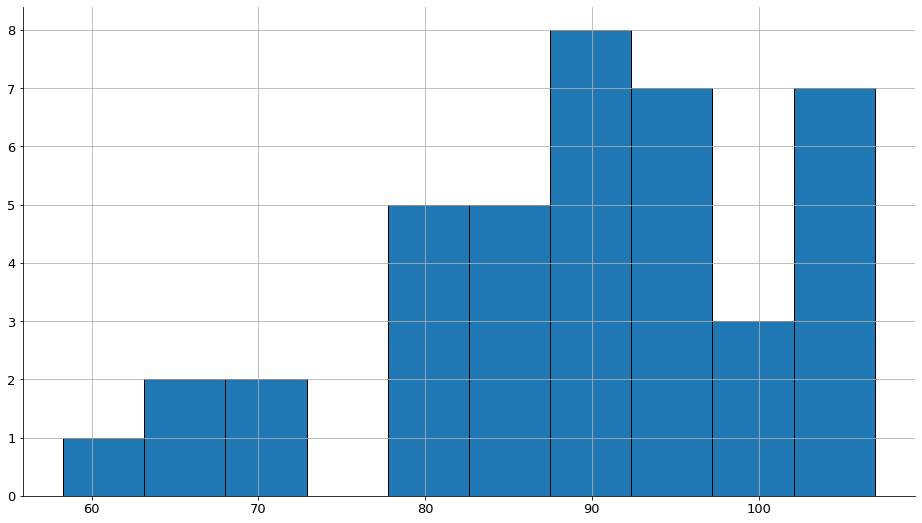

In [84]:
office1.hist()

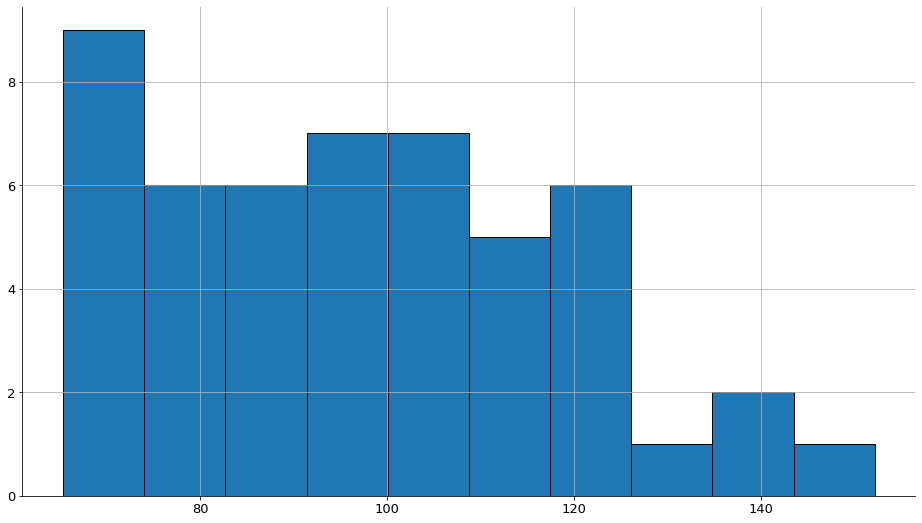

In [85]:
office2.hist()

In [86]:
#Ho: There is no difference in average time it takes to sell homes between office 1 and 2
#Ha: There is a difference in average time it takes to sell homes between office 1 and 2
office1 = np.random.normal(90, 15, 40)
office2 = np.random.normal(100, 20, 50)
alpha = .05

In [87]:
##Verify assumptions
#independent samples - yes
#normal dist - good enough, plenty of observations
#equal variances - no, set equal_var to False
print(office1.var())
print(office2.var())

320.19448460928777
410.6652026774958


In [88]:
##Set significance level
alpha = .05

In [89]:
#Compute test statistic
t, p = stats.ttest_ind(office1, office2, equal_var = False)
t, p/2

(-2.2679280513671043, 0.012904226618597171)

In [90]:
#Decide
print("is p/2 < alpha?", p/2 < alpha)

is p/2 < alpha? True


In [91]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


#### - Load the mpg dataset and use it to answer the following questions:
    - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    - Are compact cars more fuel-efficient than the average car?
    - Do manual cars get better gas mileage than automatic cars?

In [92]:
from pydataset import data
mpg = data('mpg')
mpg['avg_mpg'] = ((mpg.hwy + mpg.cty) / 2) # avg the cty and hwy and make a separate column
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [93]:
### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
## Two Sample T-Test
fe = mpg[(mpg.year == 1999) | (mpg.year == 2008)] # only 1999 and 2008 ar data

fe_99 = fe[fe.year == 1999].avg_mpg # only mpg data for the 1999 cars, series
fe_08 = fe[fe.year == 2008].avg_mpg # only mpg data for the 2008 cars, series



Text(0.5, 1.0, 'Average MPG for 1999 Cars')

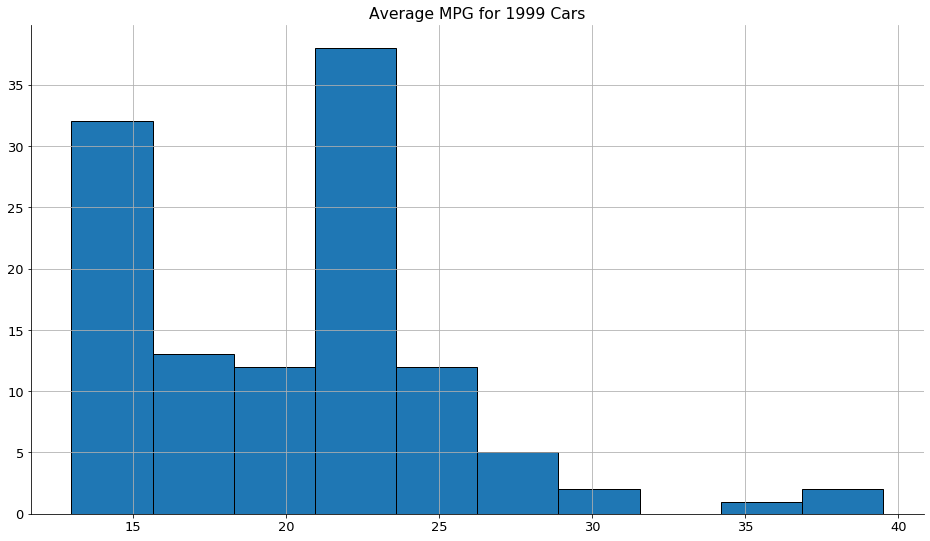

In [94]:
# A1. PLOT DISTRIBUTIONS
fe_99.hist() #plot distribution 1999 mpg
plt.title('Average MPG for 1999 Cars')

Text(0.5, 1.0, 'Average MPG for 2008 Cars')

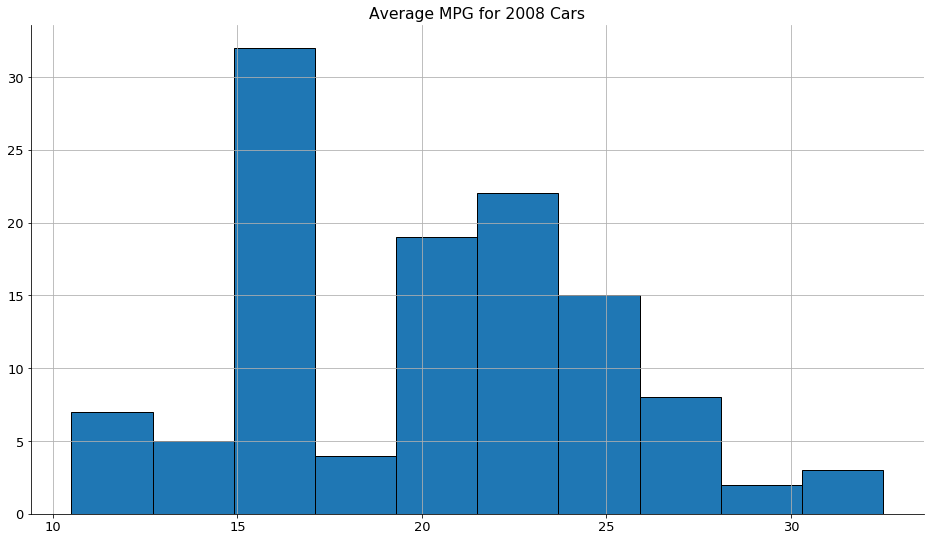

In [95]:
# A1. PLOT DISTRIBUTIONS
fe_08.hist() #plot distribution 2008 mpg
plt.title('Average MPG for 2008 Cars')

In [96]:
## B. SET HYPOTHESIS 
#Ho: the avgerage mpg of 1999 cars = the average mpg of 2008 cars
#Ha: the average mpg of 1999 cars is < the average mpg of 2008 cars

In [97]:
## C. SET SIGNIFICANCE LEVEL
alpha = .05

In [98]:
## D. VERIFY ASSUMPTIONS
#independent samples - yes
#normal dist - good enough, plenty of observations
#equal variances - no, set equal_var to False
print(fe_99.var())
print(fe_08.var())

27.122605363984682
24.097480106100797


In [99]:
## E. COMPUTE TEST STATISTIC
t, p = stats.ttest_ind(fe_99, fe_08, equal_var = False)
t, p

(0.21960177245940962, 0.8263750772060638)

In [100]:
# F. DECIDE
print("is p/2 < alpha?", p/2 < alpha)
print("is t < 0? ", t < 0)

is p/2 < alpha? False
is t < 0?  False


In [101]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


In [102]:
### Are compact cars more fuel-efficient than the average car?
## One Sample T-Test
compact = mpg[mpg['class'] == 'compact']

mpg_compact = compact.avg_mpg
mpg_avg = mpg.avg_mpg

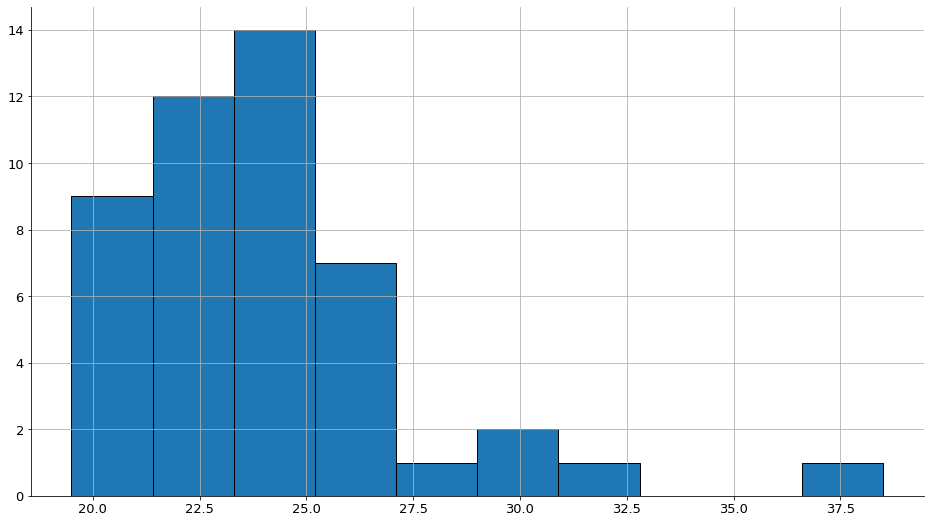

In [103]:
## A1. PLOT DISTRIBUTIONS
mpg_compact.hist()

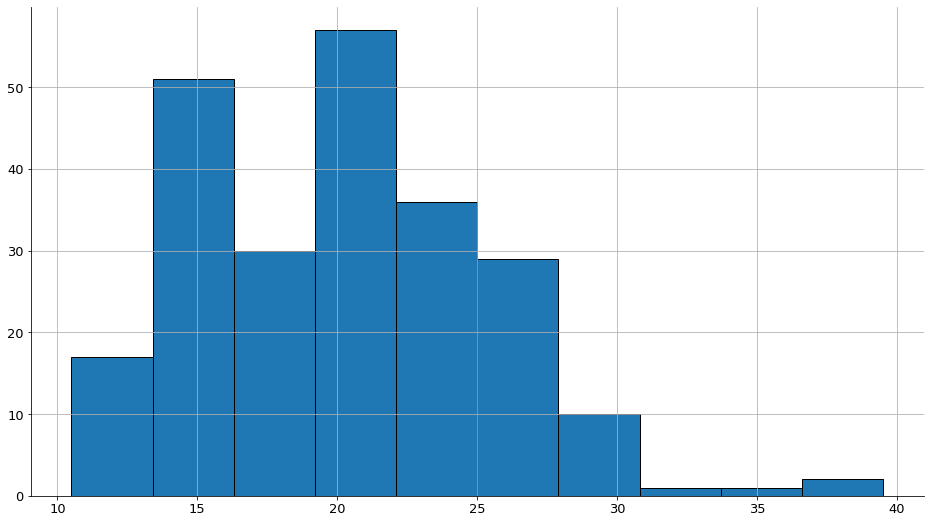

In [104]:
## A2. PLOT DISTRIBUTIONS
mpg_avg.hist()

In [105]:
## B. SET HYPOTHESIS 
# Ho: Mean of compact cars = mean of all cars
# Ha: mean of compact cars > mean of all cars

In [106]:
## C. SET SIGNIFICANCE LEVEL
alpha = .05

In [107]:
## D. VERIFY ASSUMPTIONS
#independent samples - yes
#normal dist - good enough, plenty of observations
#equal variances - no, set equal_var to False
print(len(mpg_compact))
print(mpg_compact.var())
print(mpg_avg.var())

47
12.442876965772433
25.50542900113715


In [108]:
## E. COMPUTE TEST STATISTIC
t, p = stats.ttest_ind(mpg_compact, mpg_avg, equal_var = False)
t, p/2

(6.646345489688162, 1.1788969801892359e-09)

In [109]:
# F. DECIDE
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


In [110]:
### Do manual cars get better gas mileage than automatic cars?
## TWO SAMPLE T_TEST
mpg['transmission'] = mpg.trans.str[:-4]
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,auto


In [111]:
auto_mpg = mpg[mpg.transmission == 'auto'].avg_mpg
manual_mpg = mpg[mpg.transmission == 'manual'].avg_mpg

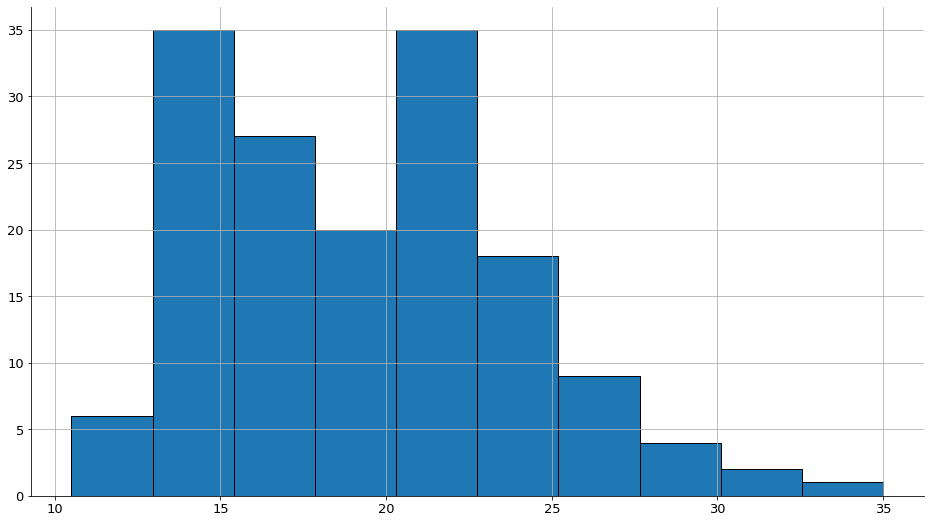

In [112]:
# A1. PLOT DISTRIBUTIONS
auto_mpg.hist()

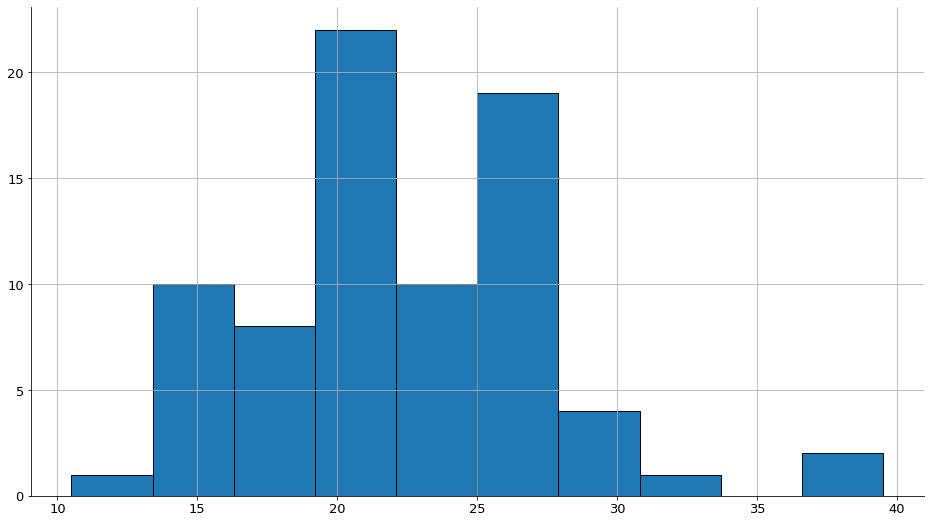

In [113]:
# A2. PLOT DISTRIBUTIONS
manual_mpg.hist()

In [114]:
## B. SET HYPOTHESIS 
# Ho: Mean of manual mpg = mean of auto mpg
# Ha: mean of manual mpg > mean of auto mpg

In [115]:
## C. SET SIGNIFICANCE LEVEL
alpha = .05

In [116]:
## D. VERIFY ASSUMPTIONS
#independent samples - yes
#normal dist - good enough, plenty of observations
#equal variances - no, set equal_var to False
print(len(manual_mpg))
print(len(auto_mpg))
print(manual_mpg.var())
print(auto_mpg.var())

77
157
26.635167464114826
21.942777233382337


In [117]:
## E. COMPUTE TEST STATISTIC
t, p = stats.ttest_ind(manual_mpg, auto_mpg, equal_var = False)
t, p/2

(4.443514012903071, 8.976124499958965e-06)

In [118]:
# F. DECIDE
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

is p/2 < alpha?  True
is t > 0?  True
We reject $H_{0}$


# Correlation Exercises

1. Use the `telco_churn` data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [119]:
# import telco churn data from local repo
telco_churn = pd.read_csv('Cust_Churn_Telco.csv')
# replace null values with 0
telco_churn.fillna(value=0, inplace=True)
telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Monthly Charges

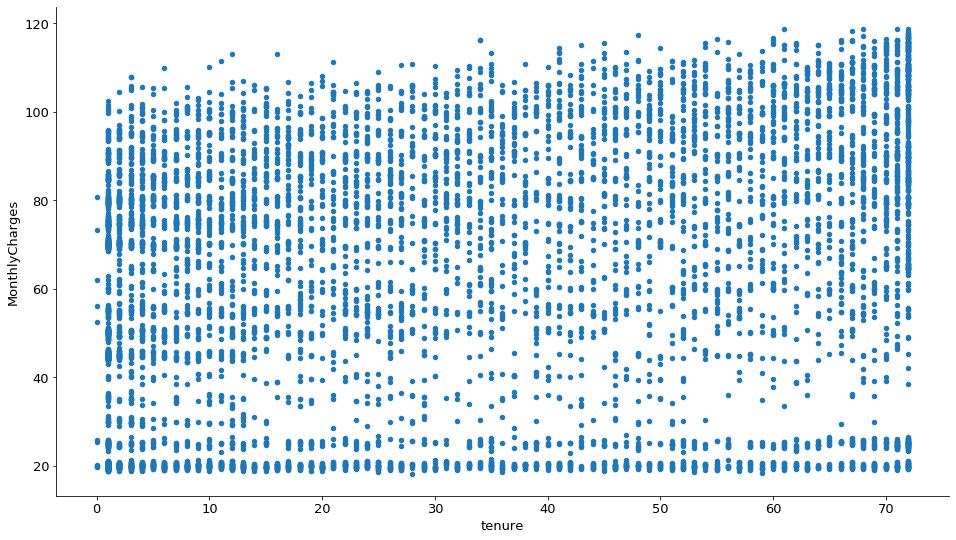

In [120]:
#plot tenure vs monthly charges
telco_churn.plot.scatter(x='tenure', y='MonthlyCharges')

In [121]:
#setup
alpha = .05
#Ho: there is no linear relationship between tenure and monthly charges
#Ha: there is a linear relationship between tenure and monthly charges

x = telco_churn.tenure
y = telco_churn.MonthlyCharges

r, p = stats.pearsonr(x,y)
print('r = ', r)
print('p = ', p)

r =  0.24789985628615002
p =  4.0940449915016345e-99


In [122]:
# conclusion: If our p-value is less than α , 
# we reject the null hypothesis, otherwise, 
# we fail to reject the null hypothesis.

if p < alpha:
    print("We reject $H_{0}$")  
else:
    print("We fail to reject $H_{0}$")

We reject $H_{0}$


Total charges

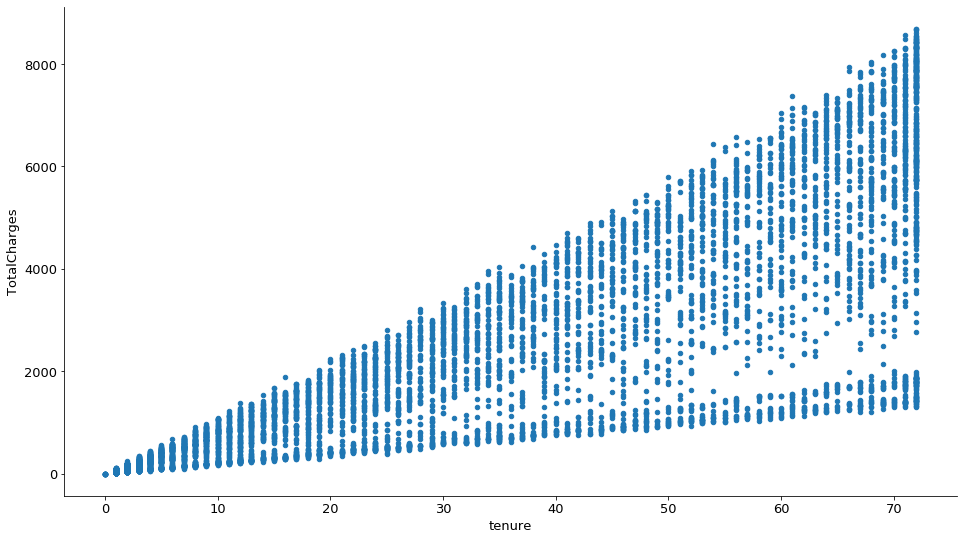

In [123]:
#plot tenure vs. total charges
telco_churn.plot.scatter(x='tenure', y='TotalCharges')

In [124]:
#setup
alpha = .05
#Ho: there is no linear relationship between tenure and total charges
#Ha: there is a linear relationship between tenure and total charges

x = telco_churn.tenure
y = telco_churn.TotalCharges

r, p = stats.pearsonr(x,y)
print('r = ', r)
print('p = ', p)

r =  0.8261783979502421
p =  0.0


In [125]:
# conclusion: If our p-value is less than α , 
# we reject the null hypothesis, otherwise, 
# we fail to reject the null hypothesis.

if p < alpha:
    print("We reject $H_{0}$")  
else:
    print("We fail to reject $H_{0}$")

We reject $H_{0}$


2. Use the `employees` database.
    - Is there a relationship between how long an employee has been with the company and their salary?
    - Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [126]:
#import employees database with current salaries joined
from env import host, password, user

def get_connection(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
sql_query = '''SELECT *
FROM employees
JOIN salaries as s
	USING(emp_no)
WHERE s.to_date > NOW();'''

def get_employees_data():
    return pd.read_sql(sql_query, get_connection('employees'))

emp = get_employees_data()
emp.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


tenure vs. salary

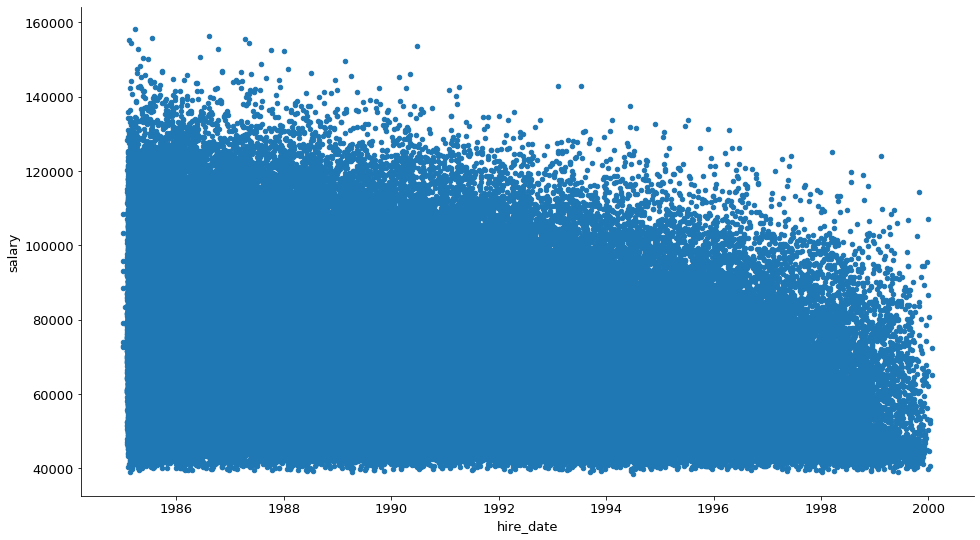

In [127]:
#plot
emp.plot.scatter(x='hire_date', y='salary')

In [128]:
emp.hire_date.astype('datetime64')
#emp['tenure'] = pd.Timestamp.now() - emp.hire_date
#today = pd.datetime.now().date()
#today
#emp.hire_date

0        1986-06-26
1        1985-11-21
2        1986-08-28
3        1986-12-01
4        1989-09-12
            ...    
240119   1993-01-12
240120   1990-09-27
240121   1986-04-21
240122   1993-10-13
240123   1997-11-30
Name: hire_date, Length: 240124, dtype: datetime64[ns]

In [129]:
#setup
alpha = .05
#Ho: there is no linear relationship between hire date and salary
#Ha: there is a linear relationship between hire date and salary

x = emp.hire_date
y = emp.salary

r, p = stats.pearsonr(x,y)
print('r = ', r)
print('p = ', p)

TypeError: unsupported operand type(s) for +: 'float' and 'datetime.date'

In [ ]:
# conclusion: If our p-value is less than α , 
# we reject the null hypothesis, otherwise, 
# we fail to reject the null hypothesis.

if p < alpha:
    print("We reject $H_{0}$")  
else:
    print("We fail to reject $H_{0}$")

3. Use the `sleepstudy` data. Is there a relationship between days and reaction time?

In [130]:
#load the sleepstudy data
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


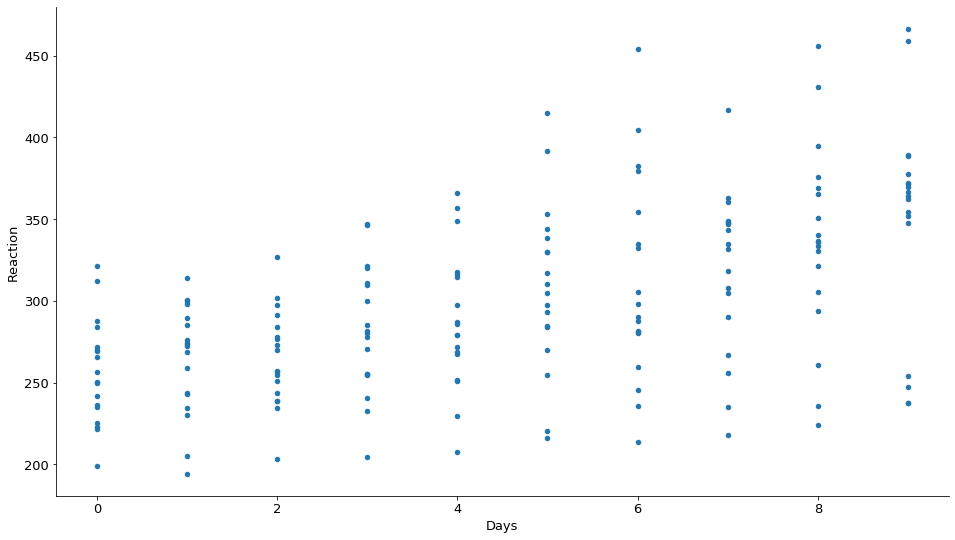

In [131]:
#plot days vs reaction
sleep.plot.scatter(y='Reaction', x='Days')

In [132]:
#setup
alpha = .05
#Ho: there is no linear relationship between days and reaction time
#Ha: there is a linear relationship between days and reaction time

x = sleep.Days
y = sleep.Reaction

r, p = stats.pearsonr(x,y)
print('r = ', r)
print('p = ', p)

r =  0.5352302262650253
p =  9.894096322214812e-15


In [133]:
# conclusion: If our p-value is less than α , 
# we reject the null hypothesis, otherwise, 
# we fail to reject the null hypothesis.

if p < alpha:
    print("We reject $H_{0}$")  
else:
    print("We fail to reject $H_{0}$")

We reject $H_{0}$


# Chi Square Exercises

#### 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 	                   Codeup Student	Not Codeup Student
                       
Uses a Macbook	       49	            20

Doesn't Use A Macbook	1	            30

#### 2. Choose another 2 categorical variables from the mpg dataset and perform a chi square contingency table test with them. Be sure to state your null and alternative hypotheses.

In [134]:
mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
avg_mpg         40
transmission     2
dtype: int64

In [135]:
# Is class independent of wheel drive?
observed = pd.crosstab(mpg.drv, mpg['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
drv,,,,,,,
4,0,12,3,0,33,4,51
f,0,35,38,11,0,22,0
r,5,0,0,0,0,9,11


In [136]:
#Ho: class and wheel drive are independent (not dependent)
#Ha: class and wheel drive are dependent
alpha = .01

In [137]:
#formula
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [138]:
null_hypothesis = "Class and Wheel Drive are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the null hypothesis
We reject the hypothesis that Class and Wheel Drive are independent
1.1048811174475079e-40


#### 3. Use the data from the employees database to answer these questions:
    - Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
    - Is an employee's gender independent of whether or not they are or have been a manager?

In [139]:
#import employees database with current dept joined
from env import host, password, user

def get_connection(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
sql_query = '''SELECT emp_no, gender, dept_name
FROM employees as e
JOIN dept_emp as de
	USING(emp_no)
JOIN departments as d
	USING(dept_no)
WHERE to_date > NOW();
'''

def get_employees_data():
    return pd.read_sql(sql_query, get_connection('employees'))

emp_dept = get_employees_data()
emp_dept.head()

,emp_no,gender,dept_name
0,10038,M,Customer Service
1,10049,F,Customer Service
2,10060,M,Customer Service
3,10088,F,Customer Service
4,10112,F,Customer Service


In [140]:
mkt_sales = emp_dept[(emp_dept.dept_name == 'Sales') | (emp_dept.dept_name == 'Marketing')]
mkt_sales.head()

,emp_no,gender,dept_name
104290,10017,F,Marketing
104291,10058,M,Marketing
104292,10140,F,Marketing
104293,10228,F,Marketing
104294,10239,F,Marketing


In [141]:
### Is an employee's gender independent of whether an employee works in sales or marketing? 
# (only look at current employees)
observed = pd.crosstab(mkt_sales.dept_name, mkt_sales.gender)
observed

gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


In [142]:
#Ho: gender and working in sales and marketing are independent (not dependent)
#Ha: gender and working in sales and marketing are dependent
alpha = .01

In [143]:
#formula
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [144]:
null_hypothesis = "gender and sales/marketing are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We fail to reject the null hypothesis
0.5691938610810126


In [145]:
### Is an employee's gender independent of whether or not they are or have been a manager?

#import employees database with managers
from env import host, password, user

def get_connection(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
sql_query = '''SELECT dm.emp_no, dm.to_date
FROM employees as e
JOIN dept_emp as de
	USING(emp_no)
JOIN departments as d
	USING(dept_no)
JOIN dept_manager as dm
	USING(emp_no);'''

def get_employees_data():
    return pd.read_sql(sql_query, get_connection('employees'))

emp_mgr = get_employees_data()
emp_mgr.head()

,emp_no,to_date
0,110022,1991-10-01
1,110039,9999-01-01
2,110085,1989-12-17
3,110114,9999-01-01
4,110183,1992-03-21


In [147]:
# merge manager db with emp db, fill NaN cells with 0
df = pd.merge(emp, emp_mgr, left_on='emp_no', right_on='emp_no', how='outer').fillna(value=0)
# create is manager column to indicate if employee has ever been a manager
df['is_manager'] = (df.to_date_y !=0)

observed = pd.crosstab(df.gender, df.is_manager)
observed

is_manager,False,True
gender,,
F,95997,13
M,144103,11


In [148]:
#Ho: gender and manager history are independent (not dependent)
#Ha: gender and manager history are dependent
alpha = .01

In [149]:
#formula
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [150]:
null_hypothesis = "gender and sales/marketing are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We fail to reject the null hypothesis
0.22623047939647867
